In [31]:
# 1. Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [32]:
# 2. Load the dataset:
data = pd.read_csv('/home/user/Downloads/Mall_Customers_Synthetic.csv')


In [33]:
# 3. Look at top 5 values:
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   64                  54                      32
1           2  Female   68                  96                      71
2           3    Male   61                 125                      59
3           4    Male   69                  67                      86
4           5    Male   20                  38                      28


In [34]:
# 4. Select only 'Annual Income' and 'Spending Score':
X = data.iloc[:, [3, 4]].values


In [35]:
#5. Import KMeans clustering:
#(Already done in Step 1)

In [36]:
# 6. List to store WCSS (Within Cluster Sum of Squares):
wcss = []



In [37]:
# 7. Fit KMeans for different K values:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

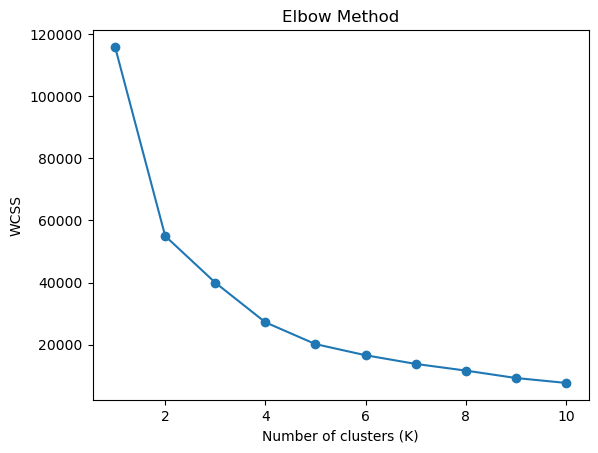

In [38]:
# 8. Plot the WCSS values:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [39]:
# 9. Fit KMeans with optimal clusters (K=5):
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)


In [40]:
# 10. print("Cluster Predictions:", y_kmeans)
print("Cluster Predictions:", y_kmeans)


Cluster Predictions: [4 3 2 0 4 2 4 4 0 3 1 3 4 3 2 3 3 0 2 0 0 0 1 3 0 0 4 3 0 1 1 0 1 2 4 4 1
 0 0 1 0 2 3 3 0 3 1 4 4 4]


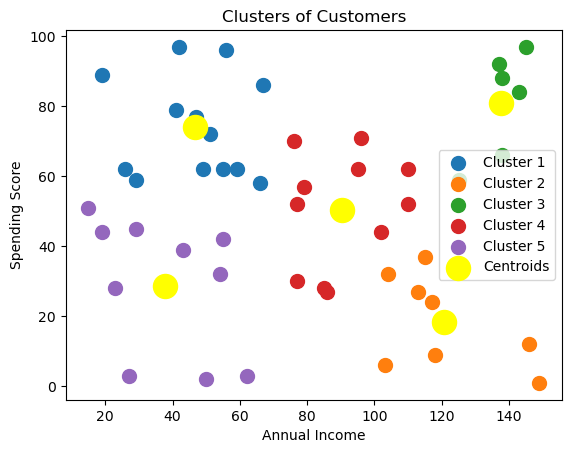

In [41]:
# 11. Visualize the clusters:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
